# Data Preprocessing

### Explore a shorter audio sample

In [212]:
import librosa
import librosa.display
from os import listdir
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

### DataGTZAN music/speech collection

This is a Kaggle dataset. The Dataset collected for the purposes of music/speech discrimination. 
The dataset consists of 120 tracks, each 30 seconds long. 
Each class (music/speech) has 60 examples. 
The tracks are all 22050Hz Mono 16-bit audio files in .wav format.

Source : https://www.kaggle.com/lnicalo/gtzan-musicspeech-collection



In [213]:
CorpusPath = 'Data/gtzan-musicspeech-collection/Corpus/'
Corpusfiles = listdir(CorpusPath)

In [214]:
import random
selected = random.choice(Corpusfiles)
print('Playing the file: '+selected)
ipd.Audio(CorpusPath+selected) 

Playing the file: eguitar.wav


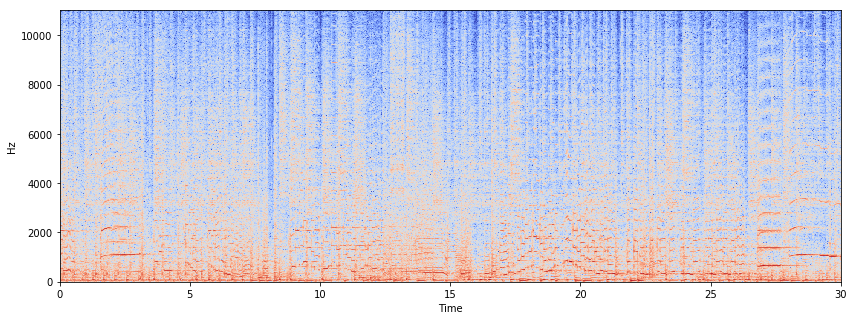

In [215]:
x, Fs = librosa.load(CorpusPath+selected)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='hz')

In [216]:
import pandas as pd
basicdata = pd.read_csv('Data/gtzan-musicspeech-collection/datalables.txt')
basicdata.head()

,Filename,Music
0,acomic2.wav,0
1,acomic.wav,0
2,allison.wav,0
3,amal.wav,0
4,austria.wav,0


In [217]:
n_mfcc = 10
mfcccol = ['Filename']+['MFC'+str(i) for i in range(n_mfcc)]
melcol = ['Filename']+['Mel'+str(j) for j in range(128)]

mfccdata = pd.DataFrame(columns=mfcccol)
meldata = pd.DataFrame(columns=melcol)

In [218]:
import numpy as np

for file in Corpusfiles:
    x, Fs = librosa.load(CorpusPath+file)
    MFCCS = np.mean(librosa.feature.mfcc(y=x, sr=Fs, n_mfcc=n_mfcc).T,axis=0)
    Mels   = np.mean(librosa.feature.melspectrogram(x, sr=Fs).T,axis=0)
    mfcrow   = [file]+list(MFCCS)
    mfccdata.loc[len(mfccdata)] = mfcrow
    melrow   = [file]+list(Mels)
    meldata.loc[len(meldata)] = melrow

In [219]:
mfccdata = mfccdata.sort_values(['Filename'])
meldata = meldata.sort_values(['Filename'])

In [220]:
mfccdata.head()

,Filename,MFC0,MFC1,MFC2,MFC3,MFC4,MFC5,MFC6,MFC7,MFC8,MFC9
91,acomic.wav,-229.321994,108.632267,-7.654047,18.624785,-2.181688,-6.630272,-2.582729,-4.635557,-13.527221,2.579913
24,acomic2.wav,-348.617529,98.462203,17.148644,26.328356,13.673916,10.471413,-0.361805,1.313543,-3.650878,3.437968
12,allison.wav,-225.887249,81.504204,-17.323344,25.768934,12.924024,0.663791,-7.933903,4.003645,0.505937,14.187019
76,amal.wav,-256.364286,76.938046,-8.520288,15.298515,-1.943931,4.816608,-15.251284,-3.793362,-1.792106,-1.694322
58,austria.wav,-237.621329,77.945700,-4.441962,21.351329,9.463467,1.728774,-8.628446,4.327470,-6.817233,3.422914


In [221]:
meldata.head()

,Filename,Mel0,Mel1,Mel2,Mel3,Mel4,Mel5,Mel6,Mel7,Mel8,...,Mel118,Mel119,Mel120,Mel121,Mel122,Mel123,Mel124,Mel125,Mel126,Mel127
91,acomic.wav,0.627522,0.014341,0.298134,1.455400,6.469339,4.515405,3.094864,2.792590,1.567164,...,0.004563,0.003244,0.004206,0.004845,0.004313,0.003577,0.002056,0.001237,0.000721,0.000499
24,acomic2.wav,0.630548,0.021059,1.922352,6.486090,3.551850,0.766634,0.786840,1.114750,0.649701,...,0.001757,0.002257,0.002804,0.003706,0.002735,0.002258,0.001330,0.000749,0.000542,0.000280
12,allison.wav,38.195659,8.164274,1.107619,0.182451,0.048373,0.048663,0.298219,0.804499,1.090206,...,0.007722,0.006291,0.009312,0.010541,0.004697,0.002956,0.002384,0.001463,0.000704,0.000359
76,amal.wav,0.138956,0.059657,0.025365,0.015746,0.032027,0.297634,0.591979,0.465078,0.234600,...,0.001291,0.001382,0.001390,0.001144,0.000980,0.000883,0.000678,0.000413,0.000341,0.000288
58,austria.wav,2.847756,0.620883,0.246830,0.273575,0.906295,1.304589,0.912031,0.480535,0.967949,...,0.013683,0.008666,0.008512,0.005350,0.008593,0.007029,0.004993,0.002394,0.000958,0.000486


In [222]:
masterdata = pd.merge(basicdata, mfccdata, on='Filename')
masterdata = pd.merge(masterdata, meldata, on='Filename')

In [223]:
masterdata.head()

,Filename,Music,MFC0,MFC1,MFC2,MFC3,MFC4,MFC5,MFC6,MFC7,...,Mel118,Mel119,Mel120,Mel121,Mel122,Mel123,Mel124,Mel125,Mel126,Mel127
0,acomic2.wav,0,-348.617529,98.462203,17.148644,26.328356,13.673916,10.471413,-0.361805,1.313543,...,0.001757,0.002257,0.002804,0.003706,0.002735,0.002258,0.001330,0.000749,0.000542,0.000280
1,acomic.wav,0,-229.321994,108.632267,-7.654047,18.624785,-2.181688,-6.630272,-2.582729,-4.635557,...,0.004563,0.003244,0.004206,0.004845,0.004313,0.003577,0.002056,0.001237,0.000721,0.000499
2,allison.wav,0,-225.887249,81.504204,-17.323344,25.768934,12.924024,0.663791,-7.933903,4.003645,...,0.007722,0.006291,0.009312,0.010541,0.004697,0.002956,0.002384,0.001463,0.000704,0.000359
3,amal.wav,0,-256.364286,76.938046,-8.520288,15.298515,-1.943931,4.816608,-15.251284,-3.793362,...,0.001291,0.001382,0.001390,0.001144,0.000980,0.000883,0.000678,0.000413,0.000341,0.000288
4,austria.wav,0,-237.621329,77.945700,-4.441962,21.351329,9.463467,1.728774,-8.628446,4.327470,...,0.013683,0.008666,0.008512,0.005350,0.008593,0.007029,0.004993,0.002394,0.000958,0.000486


In [224]:
from sklearn.preprocessing import StandardScaler

x = masterdata.iloc[:,2:].values 
x_scaled= StandardScaler().fit_transform(x)
normfeatures = pd.DataFrame(x_scaled)

In [225]:
normfeatures.columns = [x+'_n' for x in list(masterdata.columns[2:])]

In [226]:
normfeatures.head()

,MFC0_n,MFC1_n,MFC2_n,MFC3_n,MFC4_n,MFC5_n,MFC6_n,MFC7_n,MFC8_n,MFC9_n,...,Mel118_n,Mel119_n,Mel120_n,Mel121_n,Mel122_n,Mel123_n,Mel124_n,Mel125_n,Mel126_n,Mel127_n
0,-1.851857,-0.212798,1.373875,-0.071861,0.700829,0.893598,0.617526,-0.247478,0.251445,0.110595,...,-0.219206,-0.207672,-0.181053,-0.104161,-0.165571,-0.189824,-0.296492,-0.367719,-0.338097,-0.360998
1,-0.078921,0.135031,0.334114,-0.769080,-0.809148,-0.633459,0.322082,-1.078498,-1.429986,-0.087750,...,-0.114404,-0.157933,-0.095372,-0.007604,-0.005349,-0.018271,-0.159974,-0.235064,-0.256606,-0.202026
2,-0.027874,-0.792783,-0.071235,-0.122492,0.629415,0.017848,-0.389774,0.128297,0.959137,2.595308,...,0.003577,-0.004358,0.216552,0.475206,0.033625,-0.098996,-0.098272,-0.173626,-0.264314,-0.303418
3,-0.480815,-0.948951,0.297800,-1.070126,-0.786506,0.388665,-1.363189,-0.960853,0.567898,-1.075768,...,-0.236603,-0.251767,-0.267415,-0.321327,-0.343744,-0.368721,-0.419108,-0.459198,-0.429450,-0.354691
4,-0.202263,-0.914488,0.468769,-0.522311,0.299855,0.112943,-0.482167,0.173532,-0.287621,0.107115,...,0.226207,0.115312,0.167707,0.035149,0.429138,0.430706,0.392242,0.079344,-0.148911,-0.211444


In [227]:
masterdata = pd.concat([basicdata, normfeatures], axis=1)

In [228]:
masterdata.head()

,Filename,Music,MFC0_n,MFC1_n,MFC2_n,MFC3_n,MFC4_n,MFC5_n,MFC6_n,MFC7_n,...,Mel118_n,Mel119_n,Mel120_n,Mel121_n,Mel122_n,Mel123_n,Mel124_n,Mel125_n,Mel126_n,Mel127_n
0,acomic2.wav,0,-1.851857,-0.212798,1.373875,-0.071861,0.700829,0.893598,0.617526,-0.247478,...,-0.219206,-0.207672,-0.181053,-0.104161,-0.165571,-0.189824,-0.296492,-0.367719,-0.338097,-0.360998
1,acomic.wav,0,-0.078921,0.135031,0.334114,-0.769080,-0.809148,-0.633459,0.322082,-1.078498,...,-0.114404,-0.157933,-0.095372,-0.007604,-0.005349,-0.018271,-0.159974,-0.235064,-0.256606,-0.202026
2,allison.wav,0,-0.027874,-0.792783,-0.071235,-0.122492,0.629415,0.017848,-0.389774,0.128297,...,0.003577,-0.004358,0.216552,0.475206,0.033625,-0.098996,-0.098272,-0.173626,-0.264314,-0.303418
3,amal.wav,0,-0.480815,-0.948951,0.297800,-1.070126,-0.786506,0.388665,-1.363189,-0.960853,...,-0.236603,-0.251767,-0.267415,-0.321327,-0.343744,-0.368721,-0.419108,-0.459198,-0.429450,-0.354691
4,austria.wav,0,-0.202263,-0.914488,0.468769,-0.522311,0.299855,0.112943,-0.482167,0.173532,...,0.226207,0.115312,0.167707,0.035149,0.429138,0.430706,0.392242,0.079344,-0.148911,-0.211444


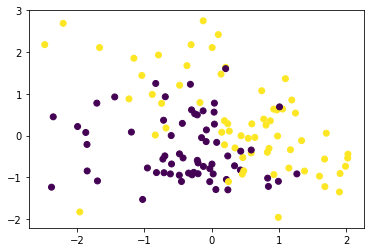

In [229]:
plt.scatter(masterdata.MFC0_n, masterdata.MFC1_n, c = masterdata.Music)

In [230]:
masterdata.to_csv('Data/MasterData.csv', index=False)

In [231]:
# Separate Features and Label
x = masterdata.loc[:, normfeatures.columns].values
y = masterdata.loc[:,['Music']].values
x = StandardScaler().fit_transform(x)

In [243]:
from sklearn.decomposition import PCA

n_pca = 50
pca = PCA(n_components=n_pca)
PCs = pca.fit_transform(x)
principalDf = pd.DataFrame(data = PCs, columns = ['PCA'+str(i) for i in range(n_pca)])
PCDf = pd.concat([principalDf, masterdata[['Music']]], axis = 1)
PCDf['Filename'] = basicdata['Filename']

In [244]:
PCDf.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,Music,Filename
0,-5.382670,-1.408019,-0.267190,1.104658,-0.055857,0.697880,0.503811,0.601028,0.603681,0.220391,...,-0.090331,-0.126543,0.222985,-0.391295,-0.040960,-0.064627,-0.165569,0.035157,0,acomic2.wav
1,-3.227412,-0.671966,-0.557932,0.169520,-0.513011,-0.485725,0.572506,-0.994831,-0.407965,-0.233180,...,0.237290,-0.309418,0.033326,-0.077643,0.323396,-0.069389,-0.499215,-0.010356,0,acomic.wav
2,-0.621593,-1.390643,-0.514943,3.923674,-1.027973,0.380351,0.872491,1.137823,-0.217091,1.492450,...,-0.024066,0.103470,0.013676,0.630781,-0.253838,-0.108359,0.087015,0.180932,0,allison.wav
3,-4.323109,-0.370215,-0.605461,0.589852,-0.232428,0.339021,0.809531,-1.550904,0.513967,0.533095,...,0.068455,0.037394,-0.621647,-0.004052,-0.449807,-0.160071,-0.157622,-0.013166,0,amal.wav
4,-0.503450,-0.882949,-0.474098,1.554466,-0.351477,-1.245828,0.190470,-0.707988,0.382783,-0.583487,...,-0.617341,0.195878,0.170842,-0.681900,0.198254,-0.261608,-0.103652,0.250543,0,austria.wav


In [238]:
pca.explained_variance_ratio_.cumsum()

array([0.31607363, 0.44306834, 0.5273112 , 0.6004102 , 0.65419525,
       0.69401716, 0.72782077, 0.75396188, 0.77665109, 0.79635115,
       0.81322009, 0.82748645, 0.84130893, 0.85351675, 0.86508426,
       0.8745631 , 0.88375925, 0.89181422, 0.89952833, 0.90678146,
       0.91339481, 0.91939069, 0.92497894, 0.930418  , 0.93544798,
       0.94044354, 0.94474996, 0.94882032, 0.9527337 , 0.95644323,
       0.95964916, 0.96283345, 0.9658406 , 0.96862278, 0.97117982,
       0.97360293, 0.97579094, 0.97778604, 0.9795766 , 0.98128427,
       0.98267765, 0.98400189, 0.98528987, 0.98648103, 0.98756772,
       0.98862749, 0.98955971, 0.99044341, 0.99123687, 0.99194392])

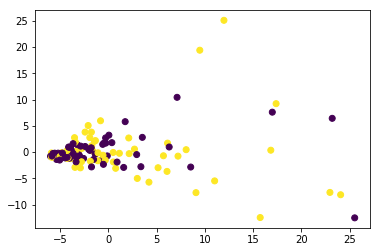

In [242]:
plt.scatter(PCDf.PCA0, PCDf.PCA1, c = PCDf.Music)

In [245]:
PCDf.to_csv('Data/PrincipalComponentData.csv', index=False)